In [1]:
import pickle

import plot_funcs
import numpy as np
import tensorly as tl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from copy import deepcopy
from collections import OrderedDict
from tensorly.metrics import congruence_coefficient

In [2]:
def is_similar(a, b, rel_tol):
    return abs(a - b) / max(abs(a), abs(b), 1.0) < rel_tol

In [5]:
ordered_dict_A = OrderedDict()
ordered_dict_CB = OrderedDict()

tol = 1e-4
gender = 'females' # should be in {'males','females'}

for model in ['parafac2','cmf','cp']:
    for no_of_components in [2,3,4,5,6,7,8]:
        for l_B in [0.0]:
            try:
                with open(f'Metabolomics/results/uniqueness/factors_{model}_{no_of_components}_components_l_B_{l_B}_{gender}.pkl', 'rb') as f:
                    results = pickle.load(f)

                best_loss = results[0][1]

                fmss = []
                fmss_A = []
                fmss_B = []
                fmss_C = []
                fmss_CB = []

                for fac_id1 in range(len(results)):
                    for fac_id2 in range(fac_id1+1,len(results)):
                        factors1 = deepcopy(results[fac_id1][0])
                        factors2 = deepcopy(results[fac_id2][0])

                        if factors1 is None or factors2 is None:
                            continue

                        if (not is_similar(results[fac_id1][1], best_loss,rel_tol=tol) or
                            not is_similar(results[fac_id2][1], best_loss,rel_tol=tol)):
                            continue

                        A1 = factors1[2]
                        A2 = factors2[2]

                        B1 = factors1[1]
                        B2 = factors2[1]

                        C1 = factors1[0]
                        C2 = factors2[0]

                        K = C1.shape[0]
                        R = C1.shape[1]
                        J = B1[0].shape[0]

                        CB1 = deepcopy(B1)
                        CB2 = deepcopy(B2)

                        if model == 'parafac2':

                            for r in range(R):
                                for k in range(K):
                                    normm = tl.norm(CB1[k][:,r])
                                    CB1[k][:,r] /= normm
                                    normm = tl.norm(CB2[k][:,r])
                                    CB2[k][:,r] /= normm

                            for r in range(R):
                                C1[:,r] /= tl.norm(C1[:,r])
                                C2[:,r] /= tl.norm(C2[:,r])

                            for r in range(R):
                                for k in range(K):
                                    CB1[k][:, r] *= C1[k,r]
                                    CB2[k][:, r] *= C2[k,r]

                        elif model == 'cmf':

                            for r in range(R):
                                for k in range(K):
                                    normm = tl.norm(CB1[k][:,r])
                                    CB1[k][:,r] /= normm
                                    C1[k,r] *= normm
                                    normm = tl.norm(CB2[k][:,r])
                                    CB2[k][:,r] /= normm
                                    C2[k,r] *= normm

                                normm2 = tl.norm(A1[:,r])
                                C1[:,r] *= normm2
                                normm2 = tl.norm(A2[:,r])
                                C2[:,r] *= normm2

                            for r in range(R):
                                C1[:,r] /= tl.norm(C1[:,r])
                                C2[:,r] /= tl.norm(C2[:,r])

                            for r in range(R):
                                for k in range(K):
                                    CB1[k][:, r] *= C1[k, r]
                                    CB2[k][:, r] *= C2[k, r]


                        elif model == 'cp':

                            CB1 = [deepcopy(CB1) for _ in range(K)]
                            CB2 = [deepcopy(CB2) for _ in range(K)]

                            for r in range(R):
                                for k in range(K):
                                    normm = tl.norm(CB1[k][:,r])
                                    CB1[k][:,r] /= normm
                                    normm = tl.norm(CB2[k][:,r])
                                    CB2[k][:,r] /= normm

                            for r in range(R):
                                C1[:,r] /= tl.norm(C1[:,r])
                                C2[:,r] /= tl.norm(C2[:,r])

                            for r in range(R):
                                for k in range(K):
                                    CB1[k][:, r] *= C1[k,r]
                                    CB2[k][:, r] *= C2[k,r]   

                        CB1 = np.vstack(CB1)
                        CB2 = np.vstack(CB2)
                    
                        fmss_A.append(congruence_coefficient(A1,A2)[0])
                        fmss_CB.append(congruence_coefficient(CB1,CB2)[0])

                    ordered_dict_A[f'{model}_{no_of_components}_{l_B}'] = deepcopy(fmss_A)
                    ordered_dict_CB[f'{model}_{no_of_components}_{l_B}'] = deepcopy(fmss_CB)

                print(f'Loaded {model}_{no_of_components}_{l_B} with {len(ordered_dict_A[f"{model}_{no_of_components}_{l_B}"])} comparisons')

            except Exception as e:
                print(f'Error loading {model}_{no_of_components}_{l_B}: {e}')
                pass

Loaded parafac2_2_0.0 with 1225 comparisons
Error loading parafac2_3_0.0: [Errno 2] No such file or directory: 'Metabolomics/results/uniqueness/factors_parafac2_3_components_l_B_0.0_females.pkl'
Error loading parafac2_4_0.0: [Errno 2] No such file or directory: 'Metabolomics/results/uniqueness/factors_parafac2_4_components_l_B_0.0_females.pkl'
Error loading parafac2_5_0.0: [Errno 2] No such file or directory: 'Metabolomics/results/uniqueness/factors_parafac2_5_components_l_B_0.0_females.pkl'
Error loading parafac2_6_0.0: [Errno 2] No such file or directory: 'Metabolomics/results/uniqueness/factors_parafac2_6_components_l_B_0.0_females.pkl'
Error loading parafac2_7_0.0: [Errno 2] No such file or directory: 'Metabolomics/results/uniqueness/factors_parafac2_7_components_l_B_0.0_females.pkl'
Error loading parafac2_8_0.0: [Errno 2] No such file or directory: 'Metabolomics/results/uniqueness/factors_parafac2_8_components_l_B_0.0_females.pkl'
Loaded cmf_2_0.0 with 1225 comparisons
Error loadi

label           model   
cmf_2_0.0       cmf         1225
parafac2_2_0.0  parafac2    1225
dtype: int64


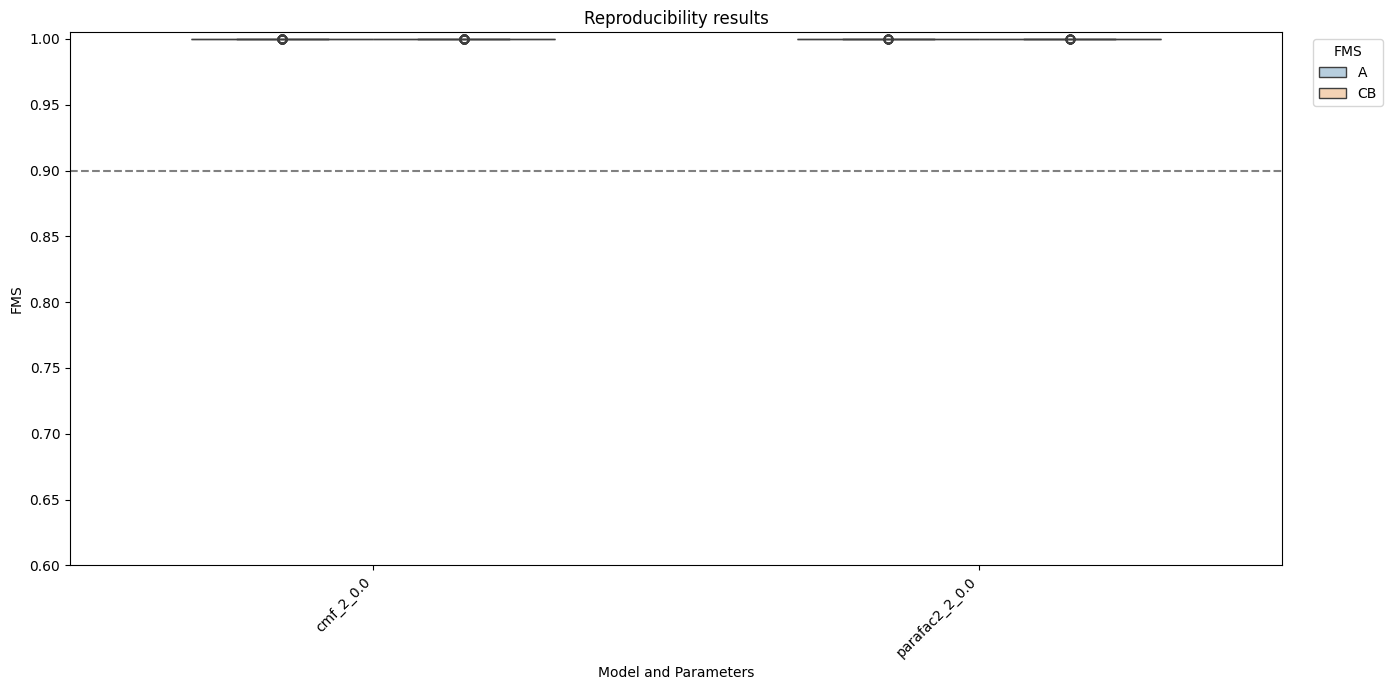

In [6]:
# Prepare data for seaborn
data = []
for key, values in ordered_dict_A.items():
    model, r, l_B = key.split('_')
    r = int(r)
    l_B = float(l_B)
    for v in values:
        data.append({'FMS A': v, 'model': model, 'r': r, 'l_B': l_B, 'label': key})

df = pd.DataFrame(data)

# --- build df_CB from ordered_dict_CB in the same way ---
data_cb = []
for key, values in ordered_dict_CB.items():
    model, r, l_B = key.split('_')
    r = int(r); l_B = float(l_B)
    for v in values:
        data_cb.append({'FMS CB': v, 'model': model, 'r': r, 'l_B': l_B, 'label': key})
df_cb = pd.DataFrame(data_cb)


# --- align keys/checks (optional but robust) ---
missing_in_cb = sorted(set(df['label']) - set(df_cb['label']))
missing_in_a  = sorted(set(df_cb['label']) - set(df['label']))
if missing_in_cb:
    print("Warning: labels missing in CB:", missing_in_cb)
if missing_in_a:
    print("Warning: labels missing in A:", missing_in_a)

# --- melt to long format with a 'metric' column ---
dfa = df.rename(columns={'FMS A': 'value'}).assign(metric='A')[['label','model','r','l_B','metric','value']]

counts = dfa.groupby(['label', 'model']).size()
print(counts)

dfc = df_cb.rename(columns={'FMS CB': 'value'}).assign(metric='CB')[['label','model','r','l_B','metric','value']]
df_long = pd.concat([dfa, dfc], ignore_index=True)

# consistent x order (optional: sort by model,r,l_B)
order = (df_long[['label','model','r','l_B']]
         .drop_duplicates()
         .sort_values(['model','r','l_B'])['label']
         .tolist())

dfa.to_pickle(f"Metabolomics/df_A_uniq_{gender}.pkl")
dfc.to_pickle(f"Metabolomics/df_CB_uniq_{gender}.pkl")

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(14, 7))
plt.ylim([0.6, 1.005])

# Two boxes per label: hue = metric
ax = sns.boxplot(
    data=df_long, x='label', y='value', hue='metric',
    showfliers=True, width=0.6, order=order
)

# Make the boxes semi-transparent
for patch in ax.patches:  # PathPatches
    r, g, b, _ = mpl.colors.to_rgba(patch.get_facecolor())
    patch.set_facecolor((r, g, b, 0.35))

# Single legend (for metric)
handles, labels = ax.get_legend_handles_labels()
# first k handles/labels correspond to 'metric' from the first layer (boxplot)
k = df_long['metric'].nunique()  # should be 2
ax.legend(handles[:k], labels[:k], title="FMS", bbox_to_anchor=(1.02, 1), loc="upper left")

ax.axhline(y=0.9, color='gray', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.title('Reproducibility results')

plt.ylabel('FMS')
plt.xlabel('Model and Parameters')
plt.tight_layout()
plt.show()